In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Loading the data 
data = pd.read_csv('fifa21_train.csv')

In [3]:
# 1. Show the dataframe shape.
data.shape

(11701, 101)

In [4]:
# Which columns are numerical?
data.select_dtypes(include= np.number).columns

Index(['ID', 'Age', 'Growth', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'OVA'],
      dtype='object')

In [5]:
# Which columns are categorical?
data.select_dtypes(include= object).columns

Index(['Name', 'Nationality', 'Club', 'BP', 'Position', 'Team & Contract',
       'Height', 'Weight', 'foot', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'GK'],
      dtype='object')

In [6]:
data=data.rename(columns={
'FK Accuracy':'Free kick Accuracy',
'GK Diving':'Goalkeeper Diving',
'GK Handling':'Goalkeeper Handling',
'GK Kicking':'Goalkeeper Kicking',
'GK Positioning':'Goalkeeper Position',
'GK Reflexes':'Goalkeeper Reflexes',
'W/F':'Weak foot',
'SM':'Skill Moves',
'A/W':'Away Win',
'D/W':'Defensive Workrate',
'IR':'International Reputation',
'PAC':'Pace',
'SHO':'Shooting',
'PAS':'Passing',
'DRI':'Dribbling',
'DEF':'Defending',
'PHY':'Physicality',
'LS':'LS: Left Striker',
'ST':'ST: Striker',
'RS':'RS: Right Striker',
'LW':'LW: Left Winger',
'LF':'LF: Left Forward',
'CF':'CF: Center Forward',
'RF':'RF: Right Forward',
'RW':'RW: Right Winger',
'LAM':'LAM: Left Attacking Midfielder',
'CAM':'CAM: Center Attacking Midfielder',
'RAM':'RAM: Right Attacking Midfielder',
'LM':'LM: Left Midfielder',
'LCM':'LCM: Left Center Midfielder',
'CM':'CM: Center Midfielder',
'RCM':'RCM: Right Center Midfielder',
'RM':'RM: Right Midfielder',
'LWB':'LWB: Left Wing Back',
'LDM':'LDM: Left Defensive Midfielder',
'CDM':'CDM: Center Defensive Midfielder',
'RDM':'RDM: Right Defensive Midfielder',
'RWB':'RWB: Right Wing Back',
'LB':'LB: Left Back',
'LCB':'LCB: Left Center Back',
'CB':'CB: Center Back',
'RCB':'RCB: Right Center Back',
'RB':'RB: Right Back',
'GK':'GK: Goalkeeper',
'OVA':'OVA: Overall Average'
})

# Check and deal with NaN values, clean columns

In [7]:
# Checking which columns have NaN values.

data[data.columns[data.isnull().any()]].isnull().sum()

Club                     18
Position                288
Joined                   41
Loan Date End         11072
Volleys                  41
Curve                    41
Agility                  41
Balance                  41
Jumping                  41
Interceptions             7
Positioning               7
Vision                   41
Composure               279
Sliding Tackle           41
Away Win                 59
Defensive Workrate       59
dtype: int64

In [8]:
# Percentage of those NaN values for total column.

sum_percent = data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

print(sum_percent.round(3))

Club                   0.154
Position               2.461
Joined                 0.350
Loan Date End         94.624
Volleys                0.350
Curve                  0.350
Agility                0.350
Balance                0.350
Jumping                0.350
Interceptions          0.060
Positioning            0.060
Vision                 0.350
Composure              2.384
Sliding Tackle         0.350
Away Win               0.504
Defensive Workrate     0.504
dtype: float64


In [9]:
# Dropping unwanted columns.

data = data.drop(['ID', 'Name', 'Position', 'Team & Contract', 'Loan Date End', 'Contract', 
                  'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
                 'Dribbling','Curve','Free kick Accuracy','Long Passing','Ball Control','Acceleration', 'Sprint Speed',
                 'Agility','Reactions','Balance','Shot Power','Jumping','Stamina','Strength','Long Shots',
                 'Aggression','Interceptions','Positioning','Vision','Penalties','Marking','Standing Tackle',
                 'Sliding Tackle','Goalkeeper Diving','Goalkeeper Handling','Goalkeeper Kicking','Goalkeeper Position',
                  'Goalkeeper Reflexes','Total Stats'], axis=1)

In [10]:
# Checking for duplicates

data.duplicated().sum()

0

In [11]:
# Checking which columns have NaN values.

data[data.columns[data.isnull().any()]].isnull().sum()

Club                   18
Joined                 41
Composure             279
Away Win               59
Defensive Workrate     59
dtype: int64

In [12]:
# Percentage of those NaN values for total column.

sum_percent = data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0]

print(sum_percent.round(3))

Club                  0.154
Joined                0.350
Composure             2.384
Away Win              0.504
Defensive Workrate    0.504
dtype: float64


##### Filling NaN's in  Composure with it's mean

In [13]:
mean_Composure = data['Composure'].mean()
mean_Composure
data['Composure'] = data['Composure'].fillna(mean_Composure)

##### Dropping NaN's from Away Win

In [14]:
data['Away Win']

0          High
1          High
2          High
3        Medium
4           Low
          ...  
11696    Medium
11697    Medium
11698      High
11699       NaN
11700      High
Name: Away Win, Length: 11701, dtype: object

In [15]:
data = data[data['Away Win'].isna()==False]

In [16]:
data['Away Win']

0          High
1          High
2          High
3        Medium
4           Low
          ...  
11695      High
11696    Medium
11697    Medium
11698      High
11700      High
Name: Away Win, Length: 11642, dtype: object

In [17]:
data[data.columns[data.isnull().any()]].isnull().sum()

Club    14
dtype: int64

In [18]:
data = data[data['Club'].isna()==False]

In [19]:
data[data.columns[data.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [20]:
# Put variable 'effective_to_date' into datetime dtype
data['Joined']=pd.to_datetime(data['Joined'], errors='coerce')

In [21]:
data["Height"] = data["Height"].replace({'"':''}, regex=True)

In [22]:
data

,Age,Nationality,Club,BP,Height,Weight,foot,Growth,Joined,Value,...,CDM: Center Defensive Midfielder,RDM: Right Defensive Midfielder,RWB: Right Wing Back,LB: Left Back,LCB: Left Center Back,CB: Center Back,RCB: Right Center Back,RB: Right Back,GK: Goalkeeper,OVA: Overall Average
0,26,Switzerland,FC Lausanne-Sport,CM,5'9,161lbs,Right,1,2015-07-01,€525K,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,30,China PR,Beijing Sinobo Guoan FC,ST,6'0,159lbs,Right,0,2015-01-16,€8.5M,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,33,Italy,Al Hilal,CAM,5'4,134lbs,Right,0,2019-01-31,€9M,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,22,Wales,Swansea City,CDM,5'10,152lbs,Right,13,2016-07-01,€275K,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,23,France,US Orléans Loiret Football,CDM,5'11,150lbs,Right,8,2018-07-01,€725K,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,29,Peru,Melgar FBC,ST,5'7,154lbs,Right,0,2019-07-01,€550K,...,45+2,45+2,46+2,44+2,43+2,43+2,43+2,44+2,19+2,65
11696,25,Iceland,Jagiellonia Białystok,LB,6'1,168lbs,Left,5,2018-02-08,€625K,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,27,France,ESTAC Troyes,GK,6'1,174lbs,Right,4,2019-07-01,€1.6M,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,22,Chile,CD Antofagasta,RM,5'6,143lbs,Right,8,2019-01-23,€1.1M,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67


In [23]:
conversions = [30.48, 2.54]

In [24]:
data['Height'] = data['Height'].apply(lambda x: pd.Series(map(int, x.split("'"))).dot(conversions))

In [25]:
data['Height']

0        175.26
1        182.88
2        162.56
3        177.80
4        180.34
          ...  
11695    170.18
11696    185.42
11697    185.42
11698    167.64
11700    170.18
Name: Height, Length: 11628, dtype: float64

In [26]:
data["Weight"] = data["Weight"].replace({'lbs':''}, regex=True)

In [27]:
data

,Age,Nationality,Club,BP,Height,Weight,foot,Growth,Joined,Value,...,CDM: Center Defensive Midfielder,RDM: Right Defensive Midfielder,RWB: Right Wing Back,LB: Left Back,LCB: Left Center Back,CB: Center Back,RCB: Right Center Back,RB: Right Back,GK: Goalkeeper,OVA: Overall Average
0,26,Switzerland,FC Lausanne-Sport,CM,175.26,161,Right,1,2015-07-01,€525K,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,30,China PR,Beijing Sinobo Guoan FC,ST,182.88,159,Right,0,2015-01-16,€8.5M,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,33,Italy,Al Hilal,CAM,162.56,134,Right,0,2019-01-31,€9M,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,22,Wales,Swansea City,CDM,177.80,152,Right,13,2016-07-01,€275K,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,23,France,US Orléans Loiret Football,CDM,180.34,150,Right,8,2018-07-01,€725K,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,29,Peru,Melgar FBC,ST,170.18,154,Right,0,2019-07-01,€550K,...,45+2,45+2,46+2,44+2,43+2,43+2,43+2,44+2,19+2,65
11696,25,Iceland,Jagiellonia Białystok,LB,185.42,168,Left,5,2018-02-08,€625K,...,60+2,60+2,63+2,63+2,61+2,61+2,61+2,63+2,16+2,65
11697,27,France,ESTAC Troyes,GK,185.42,174,Right,4,2019-07-01,€1.6M,...,26+2,26+2,25+2,24+2,26+2,26+2,26+2,24+2,69+2,70
11698,22,Chile,CD Antofagasta,RM,167.64,143,Right,8,2019-01-23,€1.1M,...,44+2,44+2,49+2,45+2,35+2,35+2,35+2,45+2,17+2,67


In [28]:
data['Weight'] = data['Weight'].astype(str).astype(int)

### Adding both numbers in last columns and creating new column

In [29]:
def string_addition(x):
    new = data[x].str.split("+", n = 1, expand = True)
    new2 = pd.DataFrame()
    new3 = pd.DataFrame()
    new2[x +"_first"]= new[0]
    new3[x +"_second"]= new[1]
    new2[x +"_first"] = new2[x +"_first"].astype(str).astype(int)
    new3[x +"_second"] = new3[x +"_second"].astype(str).astype(int)
    data[x] = new2[x +"_first"] + new3[x +"_second"]

In [30]:
addition_list = ['LS: Left Striker',
       'ST: Striker', 'RS: Right Striker', 'LW: Left Winger',
       'LF: Left Forward', 'CF: Center Forward', 'RF: Right Forward',
       'RW: Right Winger', 'LAM: Left Attacking Midfielder',
       'CAM: Center Attacking Midfielder', 'RAM: Right Attacking Midfielder',
       'LM: Left Midfielder', 'LCM: Left Center Midfielder',
       'CM: Center Midfielder', 'RCM: Right Center Midfielder',
       'RM: Right Midfielder', 'LWB: Left Wing Back',
       'LDM: Left Defensive Midfielder', 'CDM: Center Defensive Midfielder',
       'RDM: Right Defensive Midfielder', 'RWB: Right Wing Back',
       'LB: Left Back', 'LCB: Left Center Back', 'CB: Center Back',
       'RCB: Right Center Back', 'RB: Right Back', 'GK: Goalkeeper']
for x in addition_list:
    string_addition(x)

In [31]:
data['ST: Striker'][0]

59

##### Removing Stars 

In [32]:
data["Weak foot"] = data["Weak foot"].replace({'★':''}, regex=True)
data['Weak foot']= data['Weak foot'].astype(str).astype(int)
data["Skill Moves"] = data["Skill Moves"].replace({'★':''}, regex=True)
data['Skill Moves']= data['Skill Moves'].astype(str).astype(int)
data["International Reputation"] = data["International Reputation"].replace({'★':''}, regex=True)
data['International Reputation']= data['International Reputation'].astype(str).astype(int)

##### Removing € , K and M from "Value", "Release Clause" and "Wage" and standardizing the money format

In [33]:
data['Value'] = data['Value'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

In [34]:
data['Value']

0         525000
1        8500000
2        9000000
3         275000
4         725000
          ...   
11695     550000
11696     625000
11697    1600000
11698    1100000
11700     700000
Name: Value, Length: 11628, dtype: int32

In [35]:
data['Release Clause'] = data['Release Clause'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

In [36]:
data['Release Clause']

0          801000
1               0
2        15300000
3          694000
4         1400000
           ...   
11695     1200000
11696      891000
11697     2900000
11698     1700000
11700     1200000
Name: Release Clause, Length: 11628, dtype: int32

In [37]:
data['Wage'] = data['Wage'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

In [38]:
data['Wage']

0         4000
1        23000
2        49000
3         4000
4         2000
         ...  
11695      500
11696     3000
11697     4000
11698     2000
11700     2000
Name: Wage, Length: 11628, dtype: int32

##### Only interested in the year of Joining, so creating new column and dropping the datetime formatted "Joined":

In [39]:
data['Joined_year'] = pd.DatetimeIndex(data['Joined']).year
data['Joined_year']

0        2015
1        2015
2        2019
3        2016
4        2018
         ... 
11695    2019
11696    2018
11697    2019
11698    2019
11700    2019
Name: Joined_year, Length: 11628, dtype: int64

In [40]:
data = data.drop(columns=['Joined'])

###### "Hits" is still interpreted as string so going to convert it to integer, filling new NaNs with mean

In [41]:
data['Hits'] = pd.to_numeric(data['Hits'], errors='coerce')

In [42]:
mean_Hits = data['Hits'].mean()
mean_Hits
data['Hits'] = data['Hits'].fillna(mean_Composure)

In [43]:
data['Hits']

0         3.0
1        44.0
2        73.0
3         7.0
4         4.0
         ... 
11695     4.0
11696     3.0
11697     3.0
11698     6.0
11700     8.0
Name: Hits, Length: 11628, dtype: float64

In [44]:
data=data.drop(['Nationality','Club'],axis=1)

# Exploratory Data Analysis

In [45]:
# Show DataFrame info.

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11628 entries, 0 to 11700
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               11628 non-null  int64  
 1   BP                                11628 non-null  object 
 2   Height                            11628 non-null  float64
 3   Weight                            11628 non-null  int32  
 4   foot                              11628 non-null  object 
 5   Growth                            11628 non-null  int64  
 6   Value                             11628 non-null  int32  
 7   Wage                              11628 non-null  int32  
 8   Release Clause                    11628 non-null  int32  
 9   Attacking                         11628 non-null  int64  
 10  Skill                             11628 non-null  int64  
 11  Movement                          11628 non-null  int64  
 12  Powe

In [46]:
# Describe DataFrame.

data.describe()

,Age,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Skill,Movement,...,RDM: Right Defensive Midfielder,RWB: Right Wing Back,LB: Left Back,LCB: Left Center Back,CB: Center Back,RCB: Right Center Back,RB: Right Back,GK: Goalkeeper,OVA: Overall Average,Joined_year
count,11628.000000,11628.000000,11628.000000,11628.000000,1.162800e+04,11628.000000,1.162800e+04,11628.000000,11628.000000,11628.000000,...,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000,11628.000000
mean,25.242690,181.224020,165.567595,5.529928,2.559741e+06,10500.343997,4.555237e+06,258.572841,266.577571,323.059684,...,56.510578,56.973598,56.184383,54.895855,54.895855,54.895855,56.184383,22.657465,66.913055,2017.877967
std,4.936016,6.911742,15.813944,5.815522,5.280173e+06,21266.349548,1.014919e+07,72.245478,76.839957,54.961835,...,13.400993,13.209211,13.525656,14.403858,14.403858,14.403858,13.525656,14.518358,6.844883,2.406912
min,16.000000,154.940000,117.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,42.000000,43.000000,113.000000,...,18.000000,16.000000,15.000000,18.000000,18.000000,18.000000,15.000000,10.000000,45.000000,1990.000000
25%,21.000000,175.260000,154.000000,0.000000,3.750000e+05,1000.000000,5.080000e+05,232.000000,232.000000,295.000000,...,49.000000,51.000000,49.000000,44.000000,44.000000,44.000000,49.000000,17.000000,62.000000,2017.000000
50%,25.000000,180.340000,165.000000,4.000000,8.000000e+05,3000.000000,1.300000e+06,271.000000,279.000000,332.000000,...,59.000000,59.000000,59.000000,57.000000,57.000000,57.000000,59.000000,18.000000,67.000000,2019.000000
75%,29.000000,185.420000,176.000000,10.000000,2.500000e+06,11000.000000,3.900000e+06,306.000000,319.000000,361.000000,...,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,20.000000,72.000000,2019.000000
max,43.000000,205.740000,243.000000,26.000000,9.000000e+07,560000.000000,1.665000e+08,437.000000,470.000000,464.000000,...,89.000000,87.000000,86.000000,89.000000,89.000000,89.000000,86.000000,91.000000,93.000000,2020.000000


In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
# Getting only numericals into the numerical dataframe

numerical = data.select_dtypes(include=np.number)
numerical

,Age,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Skill,Movement,...,RDM: Right Defensive Midfielder,RWB: Right Wing Back,LB: Left Back,LCB: Left Center Back,CB: Center Back,RCB: Right Center Back,RB: Right Back,GK: Goalkeeper,OVA: Overall Average,Joined_year
0,26,175.26,161,1,525000,4000,801000,258,286,346,...,60,60,59,55,55,55,59,16,64,2015
1,30,182.88,159,0,8500000,23000,0,365,375,404,...,55,59,55,50,50,50,55,20,77,2015
2,33,162.56,134,0,9000000,49000,15300000,336,424,424,...,58,61,55,43,43,43,55,14,80,2019
3,22,177.80,152,13,275000,4000,694000,242,259,282,...,60,58,59,60,60,60,59,16,59,2016
4,23,180.34,150,8,725000,2000,1400000,249,280,324,...,66,66,65,63,63,63,65,17,65,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11695,29,170.18,154,0,550000,500,1200000,290,283,368,...,47,48,46,45,45,45,46,21,65,2019
11696,25,185.42,168,5,625000,3000,891000,224,248,333,...,62,65,65,63,63,63,65,18,65,2018
11697,27,185.42,174,4,1600000,4000,2900000,84,96,237,...,28,27,26,28,28,28,26,71,70,2019
11698,22,167.64,143,8,1100000,2000,1700000,286,291,388,...,46,51,47,37,37,37,47,19,67,2019


In [49]:
# Getting only categoricals into the categorical dataframe

categoricals = data.select_dtypes(include=['object'])
categoricals

,BP,foot,Away Win,Defensive Workrate
0,CM,Right,High,Medium
1,ST,Right,High,Low
2,CAM,Right,High,Medium
3,CDM,Right,Medium,Medium
4,CDM,Right,Low,Medium
...,...,...,...,...
11695,ST,Right,High,Low
11696,LB,Left,Medium,Medium
11697,GK,Right,Medium,Medium
11698,RM,Right,High,Medium


C:\Users\a\anaconda3\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


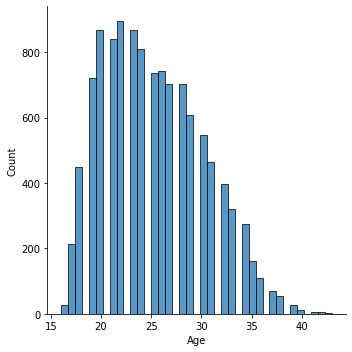

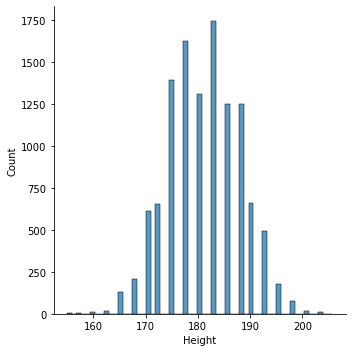

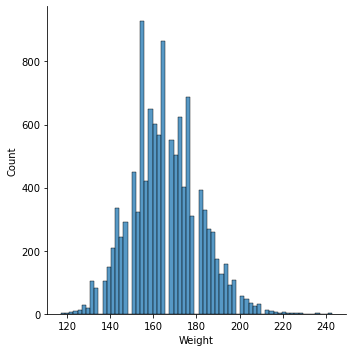

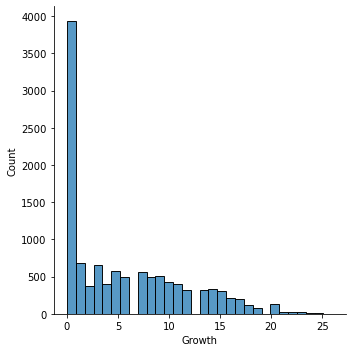

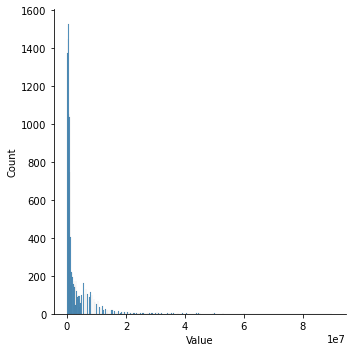

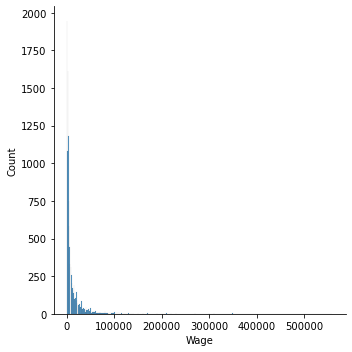

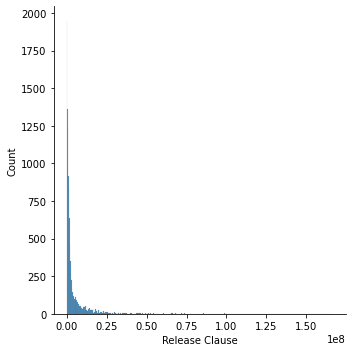

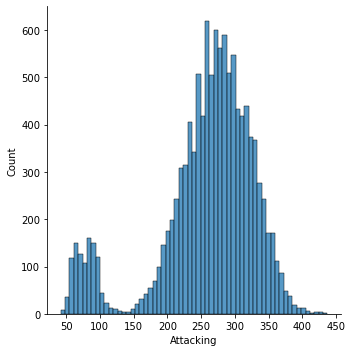

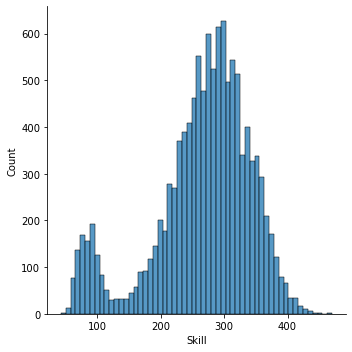

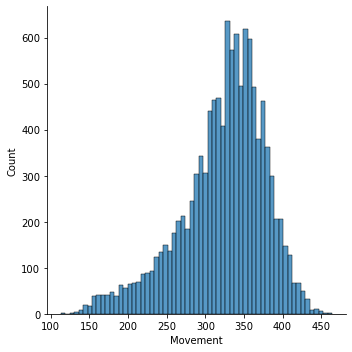

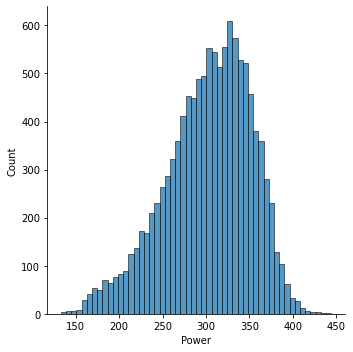

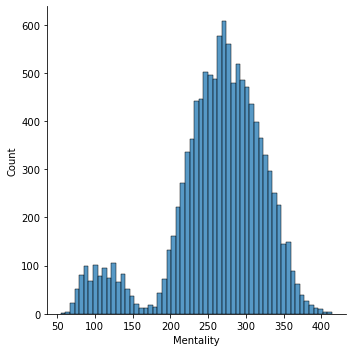

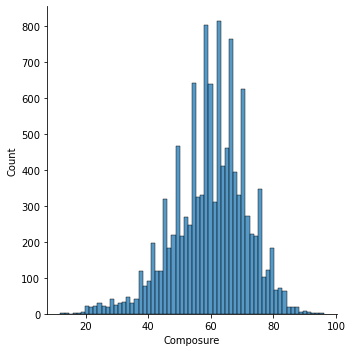

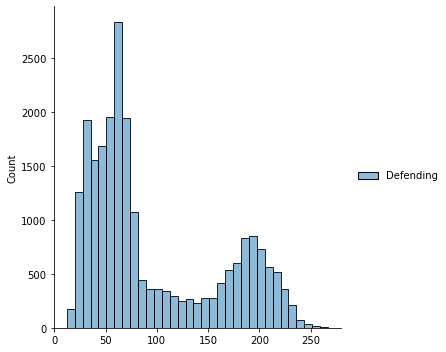

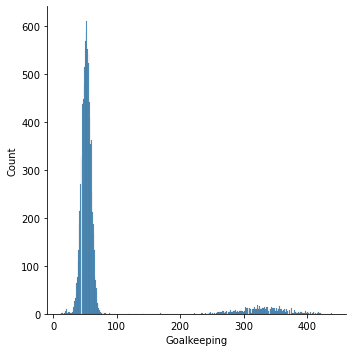

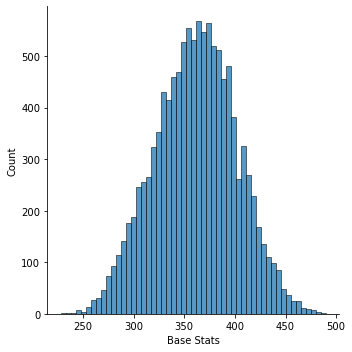

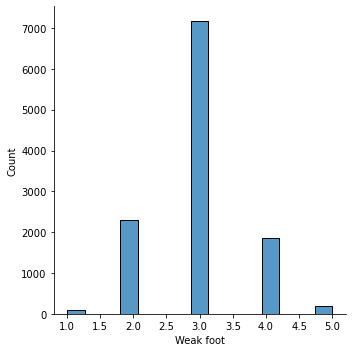

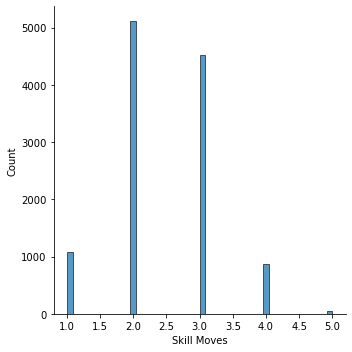

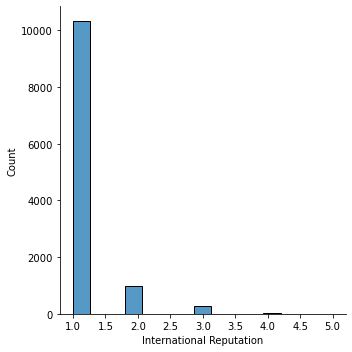

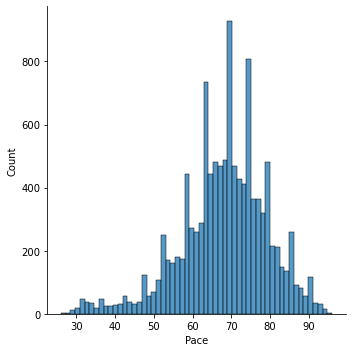

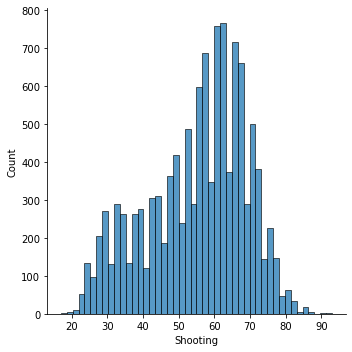

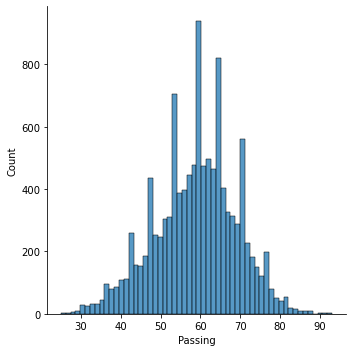

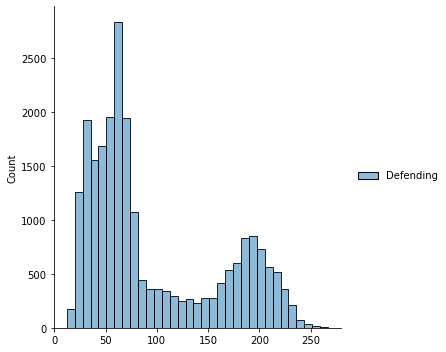

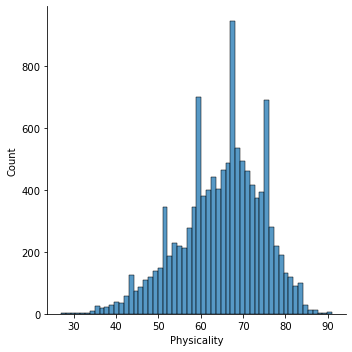

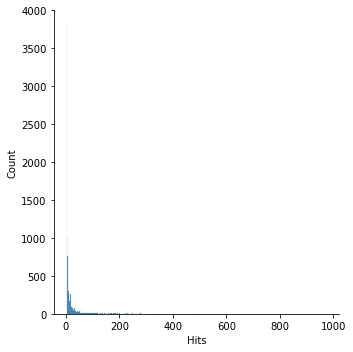

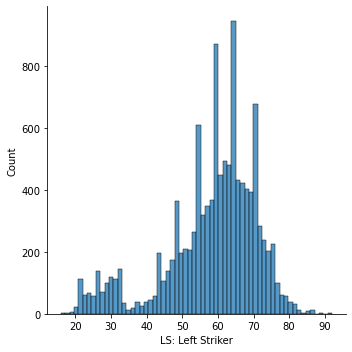

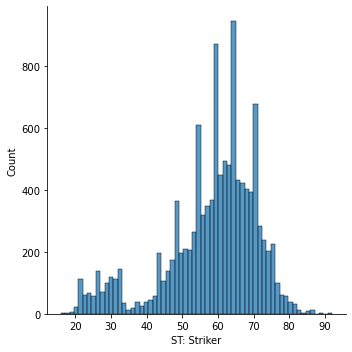

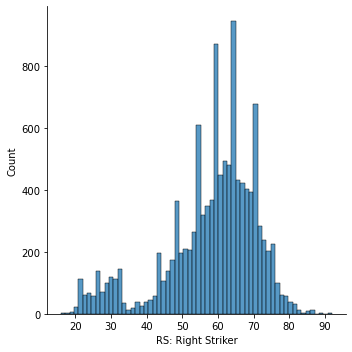

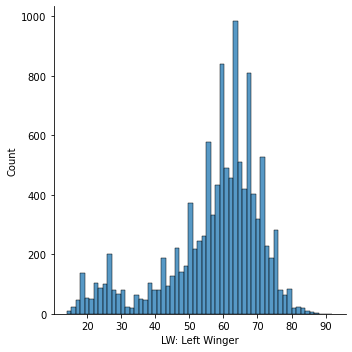

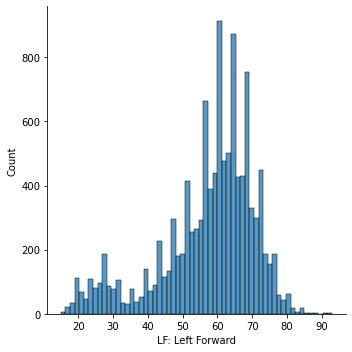

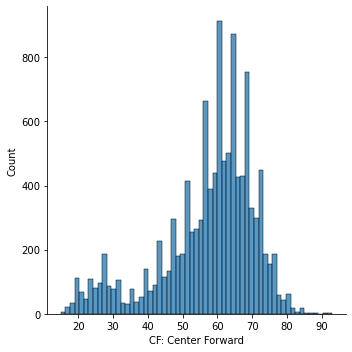

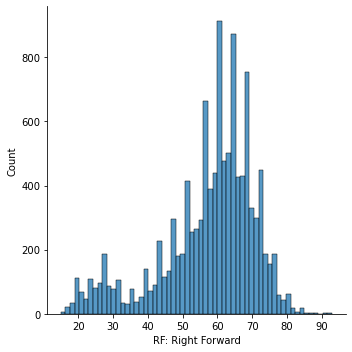

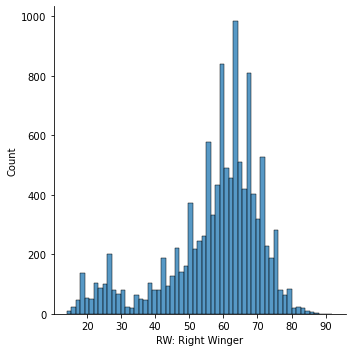

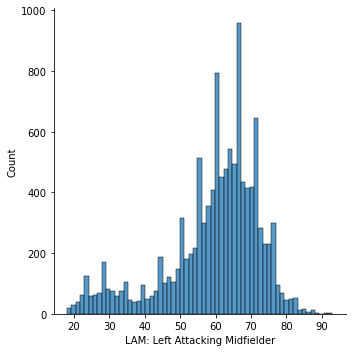

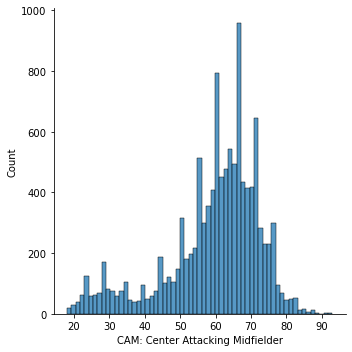

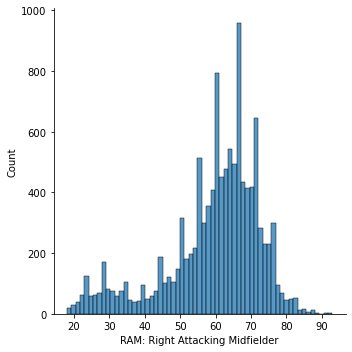

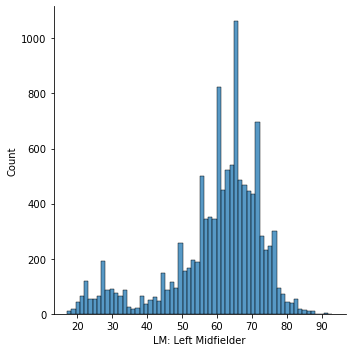

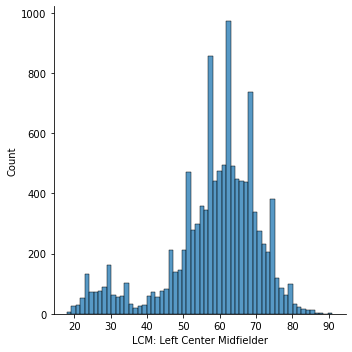

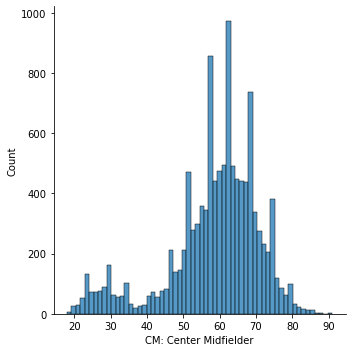

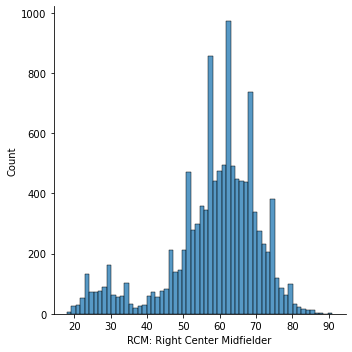

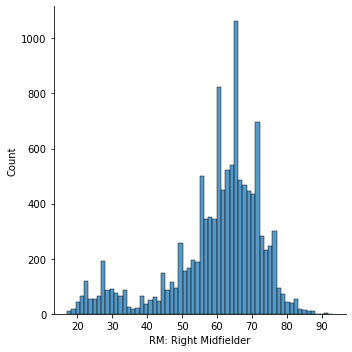

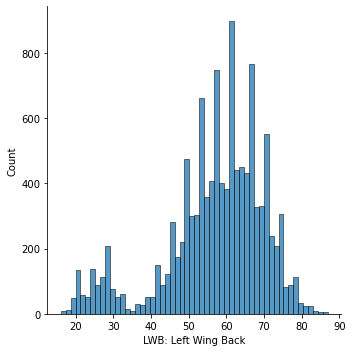

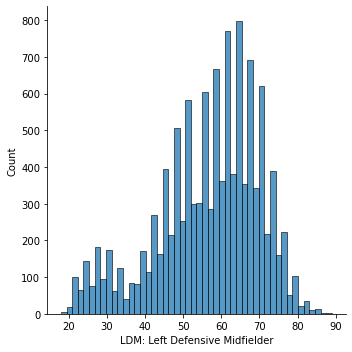

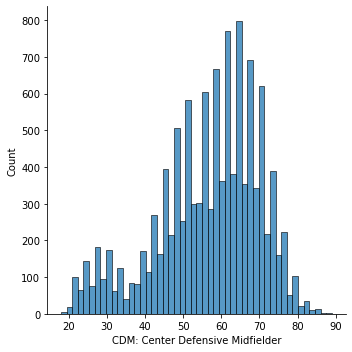

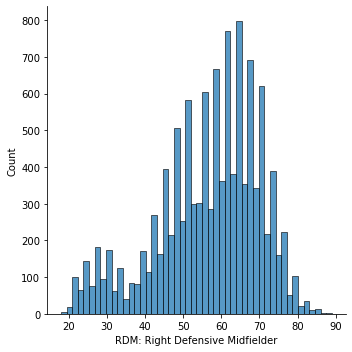

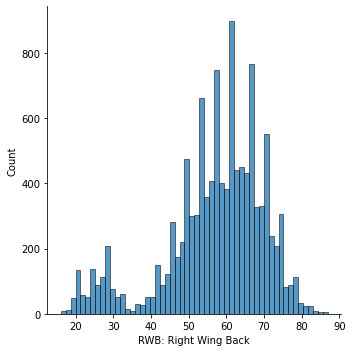

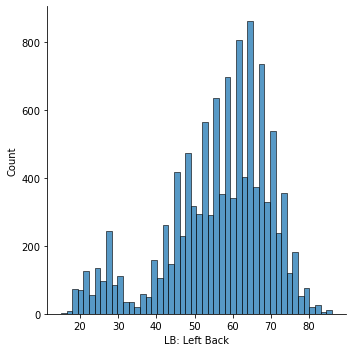

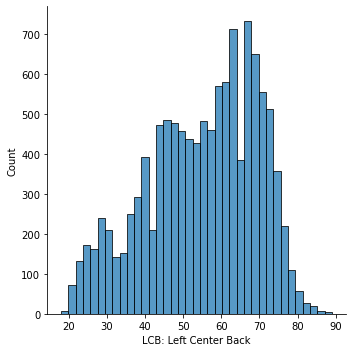

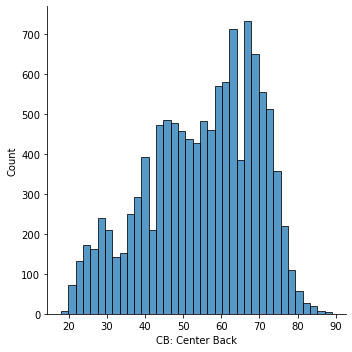

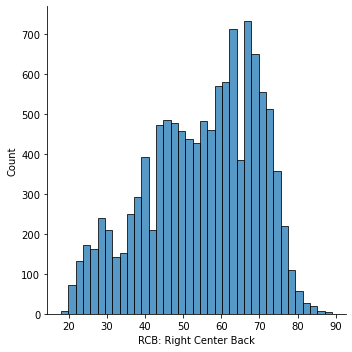

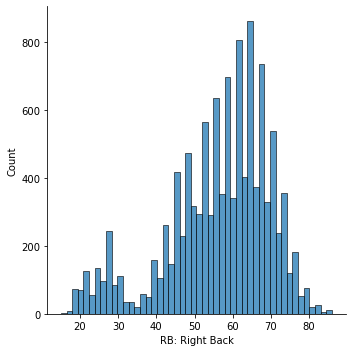

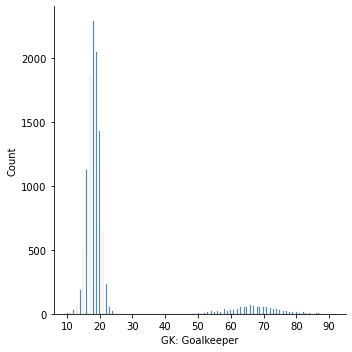

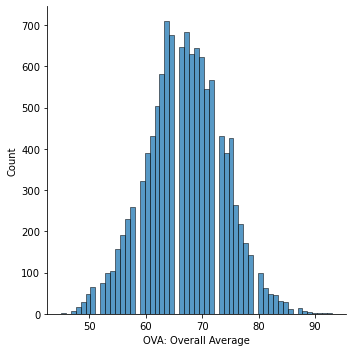

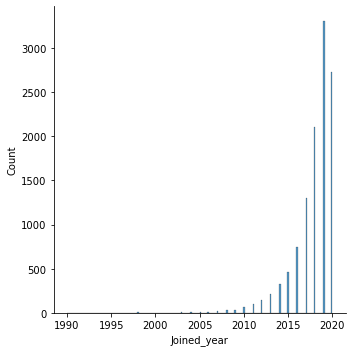

In [50]:
for column in numerical:
    sns.displot(numerical[column])

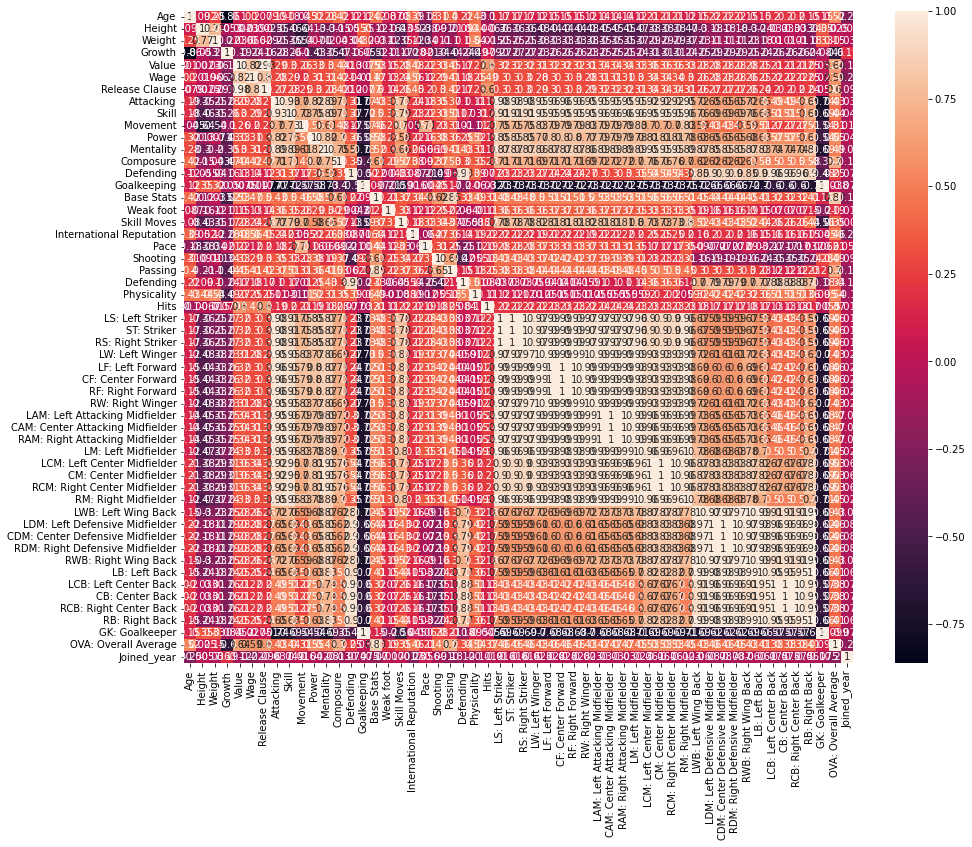

In [51]:
correlations_matrix = numerical.corr()

# Execute the display or print correlations_matrix alone if you want to see it without colour (less pretty imo)
correlations_matrix 

plt.figure(figsize = (15,12))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [52]:
display(correlations_matrix)

,Age,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Skill,Movement,...,RDM: Right Defensive Midfielder,RWB: Right Wing Back,LB: Left Back,LCB: Left Center Back,CB: Center Back,RCB: Right Center Back,RB: Right Back,GK: Goalkeeper,OVA: Overall Average,Joined_year
Age,1.000000,0.092392,0.254918,-0.862124,0.100287,0.203846,0.079341,0.192208,0.177155,-0.044934,...,0.220108,0.153985,0.151608,0.199946,0.199946,0.199946,0.151608,0.147554,0.517758,-0.252786
Height,0.092392,1.000000,0.767488,-0.053347,-0.002296,0.019297,-0.002547,-0.352437,-0.456158,-0.641771,...,-0.178138,-0.297094,-0.236993,-0.033074,-0.033074,-0.033074,-0.236993,0.349311,0.024865,-0.005661
Weight,0.254918,0.767488,1.000000,-0.219841,0.035985,0.065547,0.028611,-0.252606,-0.353565,-0.541870,...,-0.114144,-0.230572,-0.181464,0.010222,0.010222,0.010222,-0.181464,0.328126,0.147420,-0.036492
Growth,-0.862124,-0.053347,-0.219841,1.000000,-0.186915,-0.237278,-0.160834,-0.282553,-0.263891,-0.100120,...,-0.294179,-0.253370,-0.241572,-0.256337,-0.256337,-0.256337,-0.241572,-0.084378,-0.600349,0.187953
Value,0.100287,-0.002296,0.035985,-0.186915,1.000000,0.819896,0.978728,0.286750,0.297913,0.260914,...,0.279642,0.276572,0.252825,0.208739,0.208739,0.208739,0.252825,0.051765,0.638275,-0.120332
Wage,0.203846,0.019297,0.065547,-0.237278,0.819896,1.000000,0.798303,0.284979,0.288227,0.199207,...,0.278833,0.263373,0.245157,0.220056,0.220056,0.220056,0.245157,0.026799,0.585552,-0.215601
Release Clause,0.079341,-0.002547,0.028611,-0.160834,0.978728,0.798303,1.000000,0.266471,0.278706,0.245829,...,0.267305,0.264690,0.243012,0.201032,0.201032,0.201032,0.243012,0.050789,0.603820,-0.096377
Attacking,0.192208,-0.352437,-0.252606,-0.282553,0.286750,0.284979,0.266471,1.000000,0.928762,0.697225,...,0.645857,0.716471,0.645781,0.494328,0.494328,0.494328,0.645781,-0.739130,0.433429,-0.036738
Skill,0.177155,-0.456158,-0.353565,-0.263891,0.297913,0.288227,0.278706,0.928762,1.000000,0.730855,...,0.692390,0.760272,0.683801,0.505414,0.505414,0.505414,0.683801,-0.685946,0.443329,-0.049278
Movement,-0.044934,-0.641771,-0.541870,-0.100120,0.260914,0.199207,0.245829,0.697225,0.730855,1.000000,...,0.433286,0.588189,0.512853,0.271771,0.271771,0.271771,0.512853,-0.544248,0.311271,0.015675


# Prep for linear regression

#### X-y split

In [53]:
# Setting y to our target
y = data['OVA: Overall Average']
# Putting everything else to x
X = data.drop(['OVA: Overall Average'], axis=1)

#### Normalize (numerical)

In [54]:
# Splitting X into numericals and categoricals
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=['object'])
print(X_num.columns)
print(X_cat.columns)

Index(['Age', 'Height', 'Weight', 'Growth', 'Value', 'Wage', 'Release Clause',
       'Attacking', 'Skill', 'Movement', 'Power', 'Mentality', 'Composure',
       'Defending', 'Goalkeeping', 'Base Stats', 'Weak foot', 'Skill Moves',
       'International Reputation', 'Pace', 'Shooting', 'Passing', 'Defending',
       'Physicality', 'Hits', 'LS: Left Striker', 'ST: Striker',
       'RS: Right Striker', 'LW: Left Winger', 'LF: Left Forward',
       'CF: Center Forward', 'RF: Right Forward', 'RW: Right Winger',
       'LAM: Left Attacking Midfielder', 'CAM: Center Attacking Midfielder',
       'RAM: Right Attacking Midfielder', 'LM: Left Midfielder',
       'LCM: Left Center Midfielder', 'CM: Center Midfielder',
       'RCM: Right Center Midfielder', 'RM: Right Midfielder',
       'LWB: Left Wing Back', 'LDM: Left Defensive Midfielder',
       'CDM: Center Defensive Midfielder', 'RDM: Right Defensive Midfielder',
       'RWB: Right Wing Back', 'LB: Left Back', 'LCB: Left Center Back',
    

In [55]:
# Normalize between 0 and 1

MinMaxtransformer = MinMaxScaler().fit(X_num)
X_normalized = MinMaxtransformer.transform(X_num)
print(X_normalized.shape)
X_normalized = pd.DataFrame(X_normalized,columns=X_num.columns)
X_normalized.head()

(11628, 53)


,Age,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Skill,Movement,...,CDM: Center Defensive Midfielder,RDM: Right Defensive Midfielder,RWB: Right Wing Back,LB: Left Back,LCB: Left Center Back,CB: Center Back,RCB: Right Center Back,RB: Right Back,GK: Goalkeeper,Joined_year
0,0.370370,0.40,0.349206,0.038462,0.005833,0.007143,0.004811,0.546835,0.569087,0.663818,...,0.591549,0.591549,0.619718,0.619718,0.521127,0.521127,0.521127,0.619718,0.074074,0.833333
1,0.518519,0.55,0.333333,0.000000,0.094444,0.041071,0.000000,0.817722,0.777518,0.829060,...,0.521127,0.521127,0.605634,0.563380,0.450704,0.450704,0.450704,0.563380,0.123457,0.833333
2,0.629630,0.15,0.134921,0.000000,0.100000,0.087500,0.091892,0.744304,0.892272,0.886040,...,0.563380,0.563380,0.633803,0.563380,0.352113,0.352113,0.352113,0.563380,0.049383,0.966667
3,0.222222,0.45,0.277778,0.500000,0.003056,0.007143,0.004168,0.506329,0.505855,0.481481,...,0.591549,0.591549,0.591549,0.619718,0.591549,0.591549,0.591549,0.619718,0.074074,0.866667
4,0.259259,0.50,0.261905,0.307692,0.008056,0.003571,0.008408,0.524051,0.555035,0.601140,...,0.676056,0.676056,0.704225,0.704225,0.633803,0.633803,0.633803,0.704225,0.086420,0.933333


#### One Hot/Label Encoding (categorical)

In [56]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(X_cat)
encoded = encoder.transform(X_cat).toarray()
encoded
cols = encoder.get_feature_names_out(input_features=X_cat.columns)
cols

onehot_encoded = pd.DataFrame(encoded, columns=cols)
onehot_encoded

,BP_CB,BP_CDM,BP_CF,BP_CM,BP_GK,BP_LB,BP_LM,BP_LW,BP_LWB,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,foot_Right,Away Win_Low,Away Win_Medium,Defensive Workrate_Low,Defensive Workrate_Medium
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11623,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
11624,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
11625,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
11626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


#### Concat DataFrames

In [57]:
X = pd.concat([X_normalized, onehot_encoded], axis=1)
X.head()

,Age,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Skill,Movement,...,BP_RB,BP_RM,BP_RW,BP_RWB,BP_ST,foot_Right,Away Win_Low,Away Win_Medium,Defensive Workrate_Low,Defensive Workrate_Medium
0,0.370370,0.40,0.349206,0.038462,0.005833,0.007143,0.004811,0.546835,0.569087,0.663818,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.518519,0.55,0.333333,0.000000,0.094444,0.041071,0.000000,0.817722,0.777518,0.829060,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.629630,0.15,0.134921,0.000000,0.100000,0.087500,0.091892,0.744304,0.892272,0.886040,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.222222,0.45,0.277778,0.500000,0.003056,0.007143,0.004168,0.506329,0.505855,0.481481,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.259259,0.50,0.261905,0.307692,0.008056,0.003571,0.008408,0.524051,0.555035,0.601140,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


# Linear Regression

### Train-test split

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9302, 72)
(2326, 72)
(9302,)
(2326,)


In [60]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [133]:
len(X_train.columns)

72

### Model Validation

#### R²

In [61]:
# Evaluation on training portion of data (the one used for training the model)
from sklearn.metrics import r2_score

predictions = lm.predict(X_train)
r2_score(y_train, predictions)

0.9023887583571734

In [62]:
# Evalution on test portion of data

predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)

0.9068654212431472

# Testing on new data

In [63]:
data2 = pd.read_csv('fifa21_validate.csv')

In [64]:
data2=data2.rename(columns={
'FK Accuracy':'Free kick Accuracy',
'GK Diving':'Goalkeeper Diving',
'GK Handling':'Goalkeeper Handling',
'GK Kicking':'Goalkeeper Kicking',
'GK Positioning':'Goalkeeper Position',
'GK Reflexes':'Goalkeeper Reflexes',
'W/F':'Weak foot',
'SM':'Skill Moves',
'A/W':'Away Win',
'D/W':'Defensive Workrate',
'IR':'International Reputation',
'PAC':'Pace',
'SHO':'Shooting',
'PAS':'Passing',
'DRI':'Dribbling',
'DEF':'Defending',
'PHY':'Physicality',
'LS':'LS: Left Striker',
'ST':'ST: Striker',
'RS':'RS: Right Striker',
'LW':'LW: Left Winger',
'LF':'LF: Left Forward',
'CF':'CF: Center Forward',
'RF':'RF: Right Forward',
'RW':'RW: Right Winger',
'LAM':'LAM: Left Attacking Midfielder',
'CAM':'CAM: Center Attacking Midfielder',
'RAM':'RAM: Right Attacking Midfielder',
'LM':'LM: Left Midfielder',
'LCM':'LCM: Left Center Midfielder',
'CM':'CM: Center Midfielder',
'RCM':'RCM: Right Center Midfielder',
'RM':'RM: Right Midfielder',
'LWB':'LWB: Left Wing Back',
'LDM':'LDM: Left Defensive Midfielder',
'CDM':'CDM: Center Defensive Midfielder',
'RDM':'RDM: Right Defensive Midfielder',
'RWB':'RWB: Right Wing Back',
'LB':'LB: Left Back',
'LCB':'LCB: Left Center Back',
'CB':'CB: Center Back',
'RCB':'RCB: Right Center Back',
'RB':'RB: Right Back',
'GK':'GK: Goalkeeper',
'OVA':'OVA: Overall Average'
})

In [65]:
# Dropping unwanted columns.

data2 = data2.drop(['ID', 'Name', 'Position', 'Team & Contract', 'Loan Date End', 'Contract', 
                  'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
                 'Dribbling','Curve','Free kick Accuracy','Long Passing','Ball Control','Acceleration', 'Sprint Speed',
                 'Agility','Reactions','Balance','Shot Power','Jumping','Stamina','Strength','Long Shots',
                 'Aggression','Interceptions','Positioning','Vision','Penalties','Marking','Standing Tackle',
                 'Sliding Tackle','Goalkeeper Diving','Goalkeeper Handling','Goalkeeper Kicking','Goalkeeper Position',
                  'Goalkeeper Reflexes','Total Stats', 'Nationality','Club', 'OVA: Overall Average'], axis=1)

In [66]:
mean_Composure2 = data2['Composure'].mean()
mean_Composure2
data2['Composure'] = data2['Composure'].fillna(mean_Composure2)

In [67]:
# Put variable 'effective_to_date' into datetime dtype
data2['Joined']=pd.to_datetime(data2['Joined'], errors='coerce')

In [68]:
data2["Height"] = data2["Height"].replace({'"':''}, regex=True)

In [69]:
conversions = [30.48, 2.54]
data2['Height'] = data2['Height'].apply(lambda x: pd.Series(map(int, x.split("'"))).dot(conversions))

In [70]:
data2["Weight"] = data2["Weight"].replace({'lbs':''}, regex=True)

In [71]:
data2['Weight'] = data2['Weight'].astype(str).astype(int)

In [72]:
def string_addition2(x):
    new = data2[x].str.split("+", n = 1, expand = True)
    new2 = pd.DataFrame()
    new3 = pd.DataFrame()
    new2[x +"_first"]= new[0]
    new3[x +"_second"]= new[1]
    new2[x +"_first"] = new2[x +"_first"].astype(str).astype(int)
    new3[x +"_second"] = new3[x +"_second"].astype(str).astype(int)
    data2[x] = new2[x +"_first"] + new3[x +"_second"]

In [73]:
addition_list = ['LS: Left Striker',
       'ST: Striker', 'RS: Right Striker', 'LW: Left Winger',
       'LF: Left Forward', 'CF: Center Forward', 'RF: Right Forward',
       'RW: Right Winger', 'LAM: Left Attacking Midfielder',
       'CAM: Center Attacking Midfielder', 'RAM: Right Attacking Midfielder',
       'LM: Left Midfielder', 'LCM: Left Center Midfielder',
       'CM: Center Midfielder', 'RCM: Right Center Midfielder',
       'RM: Right Midfielder', 'LWB: Left Wing Back',
       'LDM: Left Defensive Midfielder', 'CDM: Center Defensive Midfielder',
       'RDM: Right Defensive Midfielder', 'RWB: Right Wing Back',
       'LB: Left Back', 'LCB: Left Center Back', 'CB: Center Back',
       'RCB: Right Center Back', 'RB: Right Back', 'GK: Goalkeeper']
for x in addition_list:
    string_addition2(x)

In [74]:
data2["Weak foot"] = data2["Weak foot"].replace({'★':''}, regex=True)
data2['Weak foot']= data2['Weak foot'].astype(str).astype(int)
data2["Skill Moves"] = data2["Skill Moves"].replace({'★':''}, regex=True)
data2['Skill Moves']= data2['Skill Moves'].astype(str).astype(int)
data2["International Reputation"] = data2["International Reputation"].replace({'★':''}, regex=True)
data2['International Reputation']= data2['International Reputation'].astype(str).astype(int)

In [75]:
data2['Value'] = data2['Value'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
data2['Release Clause'] = data2['Release Clause'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
data2['Wage'] = data2['Wage'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

In [76]:
data2['Joined_year'] = pd.DatetimeIndex(data2['Joined']).year
data2['Joined_year']
data2 = data2.drop(columns=['Joined'])

In [77]:
data2['Hits'] = pd.to_numeric(data2['Hits'], errors='coerce')

In [78]:
data2 = data2.dropna()

## Preparing new data

In [79]:
X_for_p_num = data2.select_dtypes(include = np.number)
X_for_p_cat = data2.select_dtypes(include = object)

In [80]:
X_for_p_cat.head()

,BP,foot,Away Win,Defensive Workrate
0,CB,Right,Low,High
1,CAM,Right,High,Low
2,GK,Right,Medium,Medium
3,CDM,Right,Medium,Medium
4,CDM,Right,Medium,Medium


In [81]:
encoded_for_p = encoder.transform(X_for_p_cat).toarray()
encoded_for_p
encoder.categories_
onehot_encoded_for_p = pd.DataFrame(encoded_for_p)

In [83]:
X_for_p_normalized = MinMaxtransformer.transform(X_for_p_num)
X_for_p_normalized = pd.DataFrame(X_for_p_normalized,columns=X_for_p_num.columns)

In [84]:
X_for_p = pd.concat([X_for_p_normalized, onehot_encoded_for_p], axis=1)

X_for_p.head()

,Age,Height,Weight,Growth,Value,Wage,Release Clause,Attacking,Skill,Movement,...,9,10,11,12,13,14,15,16,17,18
0,0.259259,0.65,0.611111,0.269231,0.010833,0.008929,0.000000,0.475949,0.433255,0.541311,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.222222,0.35,0.293651,0.192308,0.013333,0.005357,0.013213,0.648101,0.672131,0.746439,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.111111,0.65,0.468254,0.653846,0.001333,0.000893,0.001495,0.015190,0.021077,0.148148,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.000000,0.70,0.420635,0.884615,0.001778,0.000893,0.002787,0.437975,0.423888,0.461538,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.296296,0.65,0.420635,0.192308,0.025556,0.023214,0.025826,0.640506,0.665105,0.589744,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [86]:
results_for_p = lm.predict(X_for_p)

pd.concat([data2,pd.Series(results_for_p, name='estimate')],axis=1).head()

C:\Users\a\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\a\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,Age,BP,Height,Weight,foot,Growth,Value,Wage,Release Clause,Attacking,...,RDM: Right Defensive Midfielder,RWB: Right Wing Back,LB: Left Back,LCB: Left Center Back,CB: Center Back,RCB: Right Center Back,RB: Right Back,GK: Goalkeeper,Joined_year,estimate
0,23.0,CB,187.96,194.0,Right,7.0,975000.0,5000.0,0.0,230.0,...,63.0,61.0,63.0,69.0,69.0,69.0,63.0,18.0,2018.0,65.538363
1,22.0,CAM,172.72,154.0,Right,5.0,1200000.0,3000.0,2200000.0,298.0,...,49.0,51.0,47.0,40.0,40.0,40.0,47.0,19.0,2020.0,66.871019
2,19.0,GK,187.96,176.0,Right,17.0,120000.0,500.0,249000.0,48.0,...,20.0,18.0,18.0,20.0,20.0,20.0,18.0,55.0,2018.0,54.712237
3,16.0,CDM,190.50,170.0,Right,23.0,160000.0,500.0,464000.0,215.0,...,56.0,55.0,55.0,56.0,56.0,56.0,55.0,13.0,2020.0,55.701071
4,24.0,CDM,187.96,170.0,Right,5.0,2300000.0,13000.0,4300000.0,295.0,...,74.0,72.0,71.0,70.0,70.0,70.0,71.0,20.0,2019.0,70.521213


# Getting OVA Back and Cleaned

In [112]:
data3 = pd.read_csv('fifa21_validate.csv')

In [113]:
data3=data3.rename(columns={
'FK Accuracy':'Free kick Accuracy',
'GK Diving':'Goalkeeper Diving',
'GK Handling':'Goalkeeper Handling',
'GK Kicking':'Goalkeeper Kicking',
'GK Positioning':'Goalkeeper Position',
'GK Reflexes':'Goalkeeper Reflexes',
'W/F':'Weak foot',
'SM':'Skill Moves',
'A/W':'Away Win',
'D/W':'Defensive Workrate',
'IR':'International Reputation',
'PAC':'Pace',
'SHO':'Shooting',
'PAS':'Passing',
'DRI':'Dribbling',
'DEF':'Defending',
'PHY':'Physicality',
'LS':'LS: Left Striker',
'ST':'ST: Striker',
'RS':'RS: Right Striker',
'LW':'LW: Left Winger',
'LF':'LF: Left Forward',
'CF':'CF: Center Forward',
'RF':'RF: Right Forward',
'RW':'RW: Right Winger',
'LAM':'LAM: Left Attacking Midfielder',
'CAM':'CAM: Center Attacking Midfielder',
'RAM':'RAM: Right Attacking Midfielder',
'LM':'LM: Left Midfielder',
'LCM':'LCM: Left Center Midfielder',
'CM':'CM: Center Midfielder',
'RCM':'RCM: Right Center Midfielder',
'RM':'RM: Right Midfielder',
'LWB':'LWB: Left Wing Back',
'LDM':'LDM: Left Defensive Midfielder',
'CDM':'CDM: Center Defensive Midfielder',
'RDM':'RDM: Right Defensive Midfielder',
'RWB':'RWB: Right Wing Back',
'LB':'LB: Left Back',
'LCB':'LCB: Left Center Back',
'CB':'CB: Center Back',
'RCB':'RCB: Right Center Back',
'RB':'RB: Right Back',
'GK':'GK: Goalkeeper',
'OVA':'OVA: Overall Average'
})

In [114]:
# Dropping unwanted columns.

data3 = data3.drop(['ID', 'Name', 'Position', 'Team & Contract', 'Loan Date End', 'Contract', 
                  'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
                 'Dribbling','Curve','Free kick Accuracy','Long Passing','Ball Control','Acceleration', 'Sprint Speed',
                 'Agility','Reactions','Balance','Shot Power','Jumping','Stamina','Strength','Long Shots',
                 'Aggression','Interceptions','Positioning','Vision','Penalties','Marking','Standing Tackle',
                 'Sliding Tackle','Goalkeeper Diving','Goalkeeper Handling','Goalkeeper Kicking','Goalkeeper Position',
                  'Goalkeeper Reflexes','Total Stats', 'Nationality','Club'], axis=1)

In [115]:
mean_Composure3 = data3['Composure'].mean()
mean_Composure3
data3['Composure'] = data3['Composure'].fillna(mean_Composure3)

In [116]:
# Put variable 'effective_to_date' into datetime dtype
data3['Joined']=pd.to_datetime(data3['Joined'], errors='coerce')

In [117]:
data3["Height"] = data3["Height"].replace({'"':''}, regex=True)

In [118]:
conversions = [30.48, 2.54]
data3['Height'] = data3['Height'].apply(lambda x: pd.Series(map(int, x.split("'"))).dot(conversions))

In [119]:
data3["Weight"] = data3["Weight"].replace({'lbs':''}, regex=True)

In [120]:
data3['Weight'] = data3['Weight'].astype(str).astype(int)

In [121]:
def string_addition3(x):
    new = data3[x].str.split("+", n = 1, expand = True)
    new2 = pd.DataFrame()
    new3 = pd.DataFrame()
    new2[x +"_first"]= new[0]
    new3[x +"_second"]= new[1]
    new2[x +"_first"] = new2[x +"_first"].astype(str).astype(int)
    new3[x +"_second"] = new3[x +"_second"].astype(str).astype(int)
    data3[x] = new2[x +"_first"] + new3[x +"_second"]

In [122]:
addition_list = ['LS: Left Striker',
       'ST: Striker', 'RS: Right Striker', 'LW: Left Winger',
       'LF: Left Forward', 'CF: Center Forward', 'RF: Right Forward',
       'RW: Right Winger', 'LAM: Left Attacking Midfielder',
       'CAM: Center Attacking Midfielder', 'RAM: Right Attacking Midfielder',
       'LM: Left Midfielder', 'LCM: Left Center Midfielder',
       'CM: Center Midfielder', 'RCM: Right Center Midfielder',
       'RM: Right Midfielder', 'LWB: Left Wing Back',
       'LDM: Left Defensive Midfielder', 'CDM: Center Defensive Midfielder',
       'RDM: Right Defensive Midfielder', 'RWB: Right Wing Back',
       'LB: Left Back', 'LCB: Left Center Back', 'CB: Center Back',
       'RCB: Right Center Back', 'RB: Right Back', 'GK: Goalkeeper']
for x in addition_list:
    string_addition3(x)

In [123]:
data3["Weak foot"] = data3["Weak foot"].replace({'★':''}, regex=True)
data3['Weak foot']= data3['Weak foot'].astype(str).astype(int)
data3["Skill Moves"] = data3["Skill Moves"].replace({'★':''}, regex=True)
data3['Skill Moves']= data3['Skill Moves'].astype(str).astype(int)
data3["International Reputation"] = data3["International Reputation"].replace({'★':''}, regex=True)
data3['International Reputation']= data3['International Reputation'].astype(str).astype(int)

In [124]:
data3['Value'] = data3['Value'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
data3['Release Clause'] = data3['Release Clause'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)
data3['Wage'] = data3['Wage'].replace({'€': '', ' ': '', 'M': 'e+06', 'K': 'e+03'}, regex=True).astype(float).astype(int)

In [125]:
data3['Joined_year'] = pd.DatetimeIndex(data3['Joined']).year
data3['Joined_year']
data3 = data3.drop(columns=['Joined'])

In [126]:
data3['Hits'] = pd.to_numeric(data3['Hits'], errors='coerce')

In [127]:
data3 = data3.dropna()

In [129]:
# Evalution
y = data3['OVA: Overall Average']
predictions = lm.predict(X_for_p)
r2_score(y, predictions)

C:\Users\a\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\a\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.8948865637518834

In [130]:
r2_score(y, predictions).round(2)

0.89